In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load('en_core_web_lg')

In [240]:
train = pd.read_csv('train.csv')

In [241]:
v = list(train['sentiment'].value_counts())

In [242]:
counts = train.groupby('sentiment').agg(len)

In [243]:
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [244]:
counts.reset_index(inplace=True)

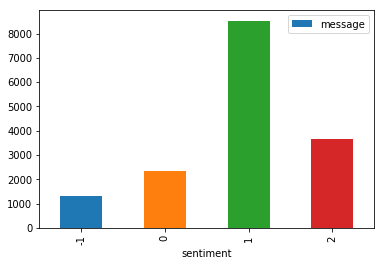

In [245]:
counts.plot(x = 'sentiment', y= 'message',kind= 'bar')

In [246]:
v

[8530, 3640, 2353, 1296]

In [247]:
percentages = [(i/sum(v))*100 for i in v]

In [248]:
percentages

[53.922498261584174, 23.010304064732285, 14.87451798470194, 8.192679688981604]

In [249]:
News = train[train['sentiment'] == 2]
Pro = train[train['sentiment'] == 1]
Neutral = train[train['sentiment'] == 0]
Anti = train[train['sentiment'] == -1]

In [250]:
train['doc'] = [nlp(text) for text in train.message]

In [251]:
train.head()

,sentiment,message,tweetid,doc
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"(PolySciMajor, EPA, chief, does, n't, think, c..."
1,1,It's not like we lack evidence of anthropogeni...,126103,"(It, 's, not, like, we, lack, evidence, of, an..."
2,2,RT @RawStory: Researchers say we have three ye...,698562,"(RT, @RawStory, :, Researchers, say, we, have,..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,"(#, TodayinMaker, #, WIRED, :, 2016, was, a, p..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"(RT, @SoyNovioDeTodas, :, It, 's, 2016, ,, and..."


In [252]:
train['num_tokens'] = [len(token) for token in train['doc']]

In [253]:
train.head()

,sentiment,message,tweetid,doc,num_tokens
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"(PolySciMajor, EPA, chief, does, n't, think, c...",24
1,1,It's not like we lack evidence of anthropogeni...,126103,"(It, 's, not, like, we, lack, evidence, of, an...",11
2,2,RT @RawStory: Researchers say we have three ye...,698562,"(RT, @RawStory, :, Researchers, say, we, have,...",22
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,"(#, TodayinMaker, #, WIRED, :, 2016, was, a, p...",17
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"(RT, @SoyNovioDeTodas, :, It, 's, 2016, ,, and...",25


In [254]:
from collections import Counter
train['countDict'] = train['doc'].apply(lambda x: [Counter(token.pos_ for token in x)])

In [255]:
train

,sentiment,message,tweetid,doc,num_tokens,countDict
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"(PolySciMajor, EPA, chief, does, n't, think, c...",24,"[{'PROPN': 2, 'NOUN': 6, 'VERB': 4, 'ADV': 1, ..."
1,1,It's not like we lack evidence of anthropogeni...,126103,"(It, 's, not, like, we, lack, evidence, of, an...",11,"[{'PRON': 2, 'VERB': 2, 'ADV': 1, 'ADP': 2, 'N..."
2,2,RT @RawStory: Researchers say we have three ye...,698562,"(RT, @RawStory, :, Researchers, say, we, have,...",22,"[{'PROPN': 3, 'PUNCT': 2, 'NOUN': 4, 'VERB': 4..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,"(#, TodayinMaker, #, WIRED, :, 2016, was, a, p...",17,"[{'SYM': 1, 'PROPN': 3, 'PUNCT': 1, 'NUM': 1, ..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"(RT, @SoyNovioDeTodas, :, It, 's, 2016, ,, and...",25,"[{'PROPN': 1, 'VERB': 5, 'PUNCT': 5, 'PRON': 1..."
5,1,Worth a read whether you do or don't believe i...,425577,"(Worth, a, read, whether, you, do, or, do, n't...",15,"[{'PROPN': 1, 'DET': 1, 'NOUN': 4, 'ADP': 2, '..."
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933,"(RT, @thenation, :, Mike, Pence, does, n’t, be...",19,"[{'PROPN': 3, 'VERB': 4, 'PUNCT': 2, 'ADV': 1,..."
7,1,RT @makeandmendlife: Six big things we can ALL...,992717,"(RT, @makeandmendlife, :, Six, big, things, we...",27,"[{'PROPN': 3, 'NOUN': 8, 'PUNCT': 3, 'NUM': 1,..."
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510,"(@AceofSpadesHQ, My, 8yo, nephew, is, inconsol...",28,"[{'VERB': 6, 'ADJ': 4, 'NOUN': 6, 'PUNCT': 3, ..."
9,1,RT @paigetweedy: no offense… but like… how do ...,260471,"(RT, @paigetweedy, :, no, offense, …, but, lik...",21,"[{'PROPN': 2, 'PUNCT': 4, 'DET': 1, 'NOUN': 3,..."


In [256]:
train['Adj'] = train['countDict'].apply(lambda x: (x[0]['ADJ']))/train['num_tokens']*100

In [257]:
train.head()

,sentiment,message,tweetid,doc,num_tokens,countDict,Adj
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"(PolySciMajor, EPA, chief, does, n't, think, c...",24,"[{'PROPN': 2, 'NOUN': 6, 'VERB': 4, 'ADV': 1, ...",12.500000
1,1,It's not like we lack evidence of anthropogeni...,126103,"(It, 's, not, like, we, lack, evidence, of, an...",11,"[{'PRON': 2, 'VERB': 2, 'ADV': 1, 'ADP': 2, 'N...",18.181818
2,2,RT @RawStory: Researchers say we have three ye...,698562,"(RT, @RawStory, :, Researchers, say, we, have,...",22,"[{'PROPN': 3, 'PUNCT': 2, 'NOUN': 4, 'VERB': 4...",4.545455
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,"(#, TodayinMaker, #, WIRED, :, 2016, was, a, p...",17,"[{'SYM': 1, 'PROPN': 3, 'PUNCT': 1, 'NUM': 1, ...",5.882353
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"(RT, @SoyNovioDeTodas, :, It, 's, 2016, ,, and...",25,"[{'PROPN': 1, 'VERB': 5, 'PUNCT': 5, 'PRON': 1...",4.000000


In [258]:
train['Noun'] = train['countDict'].apply(lambda x: (x[0]['NOUN']))/train['num_tokens']*100
train['Punct'] = train['countDict'].apply(lambda x: (x[0]['PUNCT']))/train['num_tokens']*100
train['Verb'] = train['countDict'].apply(lambda x: (x[0]['VERB']))/train['num_tokens']*100

In [259]:
train.head()

,sentiment,message,tweetid,doc,num_tokens,countDict,Adj,Noun,Punct,Verb
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"(PolySciMajor, EPA, chief, does, n't, think, c...",24,"[{'PROPN': 2, 'NOUN': 6, 'VERB': 4, 'ADV': 1, ...",12.500000,25.000000,16.666667,16.666667
1,1,It's not like we lack evidence of anthropogeni...,126103,"(It, 's, not, like, we, lack, evidence, of, an...",11,"[{'PRON': 2, 'VERB': 2, 'ADV': 1, 'ADP': 2, 'N...",18.181818,18.181818,0.000000,18.181818
2,2,RT @RawStory: Researchers say we have three ye...,698562,"(RT, @RawStory, :, Researchers, say, we, have,...",22,"[{'PROPN': 3, 'PUNCT': 2, 'NOUN': 4, 'VERB': 4...",4.545455,18.181818,9.090909,18.181818
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,"(#, TodayinMaker, #, WIRED, :, 2016, was, a, p...",17,"[{'SYM': 1, 'PROPN': 3, 'PUNCT': 1, 'NUM': 1, ...",5.882353,23.529412,5.882353,11.764706
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"(RT, @SoyNovioDeTodas, :, It, 's, 2016, ,, and...",25,"[{'PROPN': 1, 'VERB': 5, 'PUNCT': 5, 'PRON': 1...",4.000000,24.000000,20.000000,20.000000


In [260]:
df = train[['num_tokens','Adj','Noun','Punct','Verb','sentiment']]

In [261]:
df.head()

,num_tokens,Adj,Noun,Punct,Verb,sentiment
0,24,12.500000,25.000000,16.666667,16.666667,1
1,11,18.181818,18.181818,0.000000,18.181818,1
2,22,4.545455,18.181818,9.090909,18.181818,2
3,17,5.882353,23.529412,5.882353,11.764706,1
4,25,4.000000,24.000000,20.000000,20.000000,1


In [262]:
dfpos = df.groupby('sentiment').mean()

In [263]:
dfpos.reset_index(inplace=True)

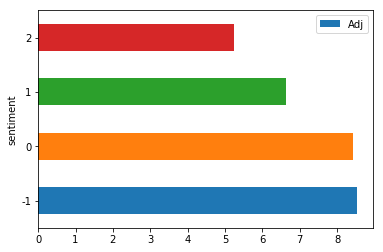

In [264]:
dfpos.plot(x = 'sentiment', y = 'Adj', kind='barh')

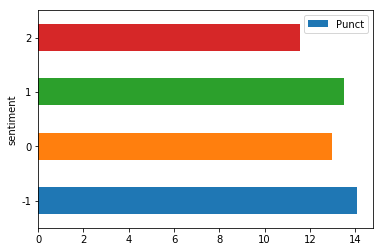

In [265]:
dfpos.plot(x = 'sentiment', y = 'Punct', kind='barh')

In [266]:
dfpos

,sentiment,num_tokens,Adj,Noun,Punct,Verb
0,-1,22.817901,8.535050,24.301698,14.083267,15.570066
1,0,20.288143,8.427943,25.574776,12.981553,14.788649
2,1,23.314420,6.635780,25.294905,13.502317,15.948669
3,2,18.143681,5.230191,31.115081,11.565707,12.699364


In [267]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc = StandardScaler()
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [268]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')

lr_model.fit(X_train, y_train)

C:\Users\Dell\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [269]:
from sklearn import metrics

# Create a prediction set:
predictions = lr_model.predict(X_test)

# Print a confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[   0   11  246   21]
 [   0   16  320   89]
 [   0   15 1562  178]
 [   0    2  431  273]]


In [270]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       278
           0       0.36      0.04      0.07       425
           1       0.61      0.89      0.72      1755
           2       0.49      0.39      0.43       706

   micro avg       0.59      0.59      0.59      3164
   macro avg       0.37      0.33      0.31      3164
weighted avg       0.50      0.59      0.51      3164



C:\Users\Dell\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [271]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_test,predictions))

0.5850189633375474


In [272]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['-1','0','1','2'], columns=['-1','0','1','2'])
df

,-1,0,1,2
-1,0,11,246,21
0,0,16,320,89
1,0,15,1562,178
2,0,2,431,273
